In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from hyperopt import hp
from fedot_ind.core.architecture.pipelines.abstract_pipeline import AbstractPipeline, ApiTemplate
from fedot_ind.core.repository.constanst_repository import SPECTRUM_ESTIMATORS
from fedot_ind.core.repository.constanst_repository import DISCRETE_WAVELETS, CONTINUOUS_WAVELETS

In [2]:
def plot_mean_sample(X,y, labels:list = [], n_channel: int = 1):
    mean_sample = []
    if len(labels) == 0:
        labels = list(np.unique(y))
    for label in labels:
        mean_sample.append(np.mean(X[y == label] , axis=0)) # Данные класса 1
    #ax = plt.gca()
    channels = [f'Channel {x}' for x in range(n_channel)]
    df = pd.DataFrame(mean_sample).T
    df.columns = labels
    df.plot(kind ='line',subplots=True, layout=(1,len(labels)),figsize=(20,10))
    plt.legend(fontsize='small')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [3]:
def plot_mean_sample_multi(X,y, labels:list = [], n_channel: int = None):
    mean_sample = {}
    if len(labels) == 0:
        labels = list(np.unique(y))
    if n_channel is None:
        n_channel = X.shape[1]
    channels = [f'Channel {x}' for x in range(n_channel)]
    for label in labels:
        mask = y == label
        for chn in range(n_channel):
            mean_sample.update({f'Label_{label}_channel_{chn}':np.mean(X[mask.flatten(),chn,:] , axis=0)}) # Данные класса 1
    #ax = plt.gca()
    df = pd.DataFrame(mean_sample)
    df.plot(kind ='line')
    plt.suptitle('Усреднённые семплы по классам')
    plt.legend(fontsize='small')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [4]:
finetune = False
metric_names = ('f1', 'accuracy', 'precision', 'roc_auc')
api_config = dict(problem='classification',
                  metric='accuracy',
                  timeout=1,
                  pop_size=10,
                  with_tunig=False,
                  n_jobs=2,
                  logging_level=20)
pipeline_creator = AbstractPipeline(task='classification')

# Our datasets and models for experiments

In [5]:
easy_to_clf_uno = 'ItalyPowerDemand'
hard_to_clf_uno = 'ElectricDevices'
easy_to_clf_multi = 'BasicMotions'
hard_to_clf_multi = 'AtrialFibrillation'
node_list_model = ['quantile_extractor','logit']

# Our datasets

In [6]:
easy_to_clf_uno_dataset = pipeline_creator.create_input_data(easy_to_clf_uno)
hard_to_clf_uno_dataset = pipeline_creator.create_input_data(hard_to_clf_uno)
easy_to_clf_multi_dataset = pipeline_creator.create_input_data(easy_to_clf_multi)
hard_to_clf_multi_dataset = pipeline_creator.create_input_data(hard_to_clf_multi)

# Lets Visualise our data

## Easy to clf data

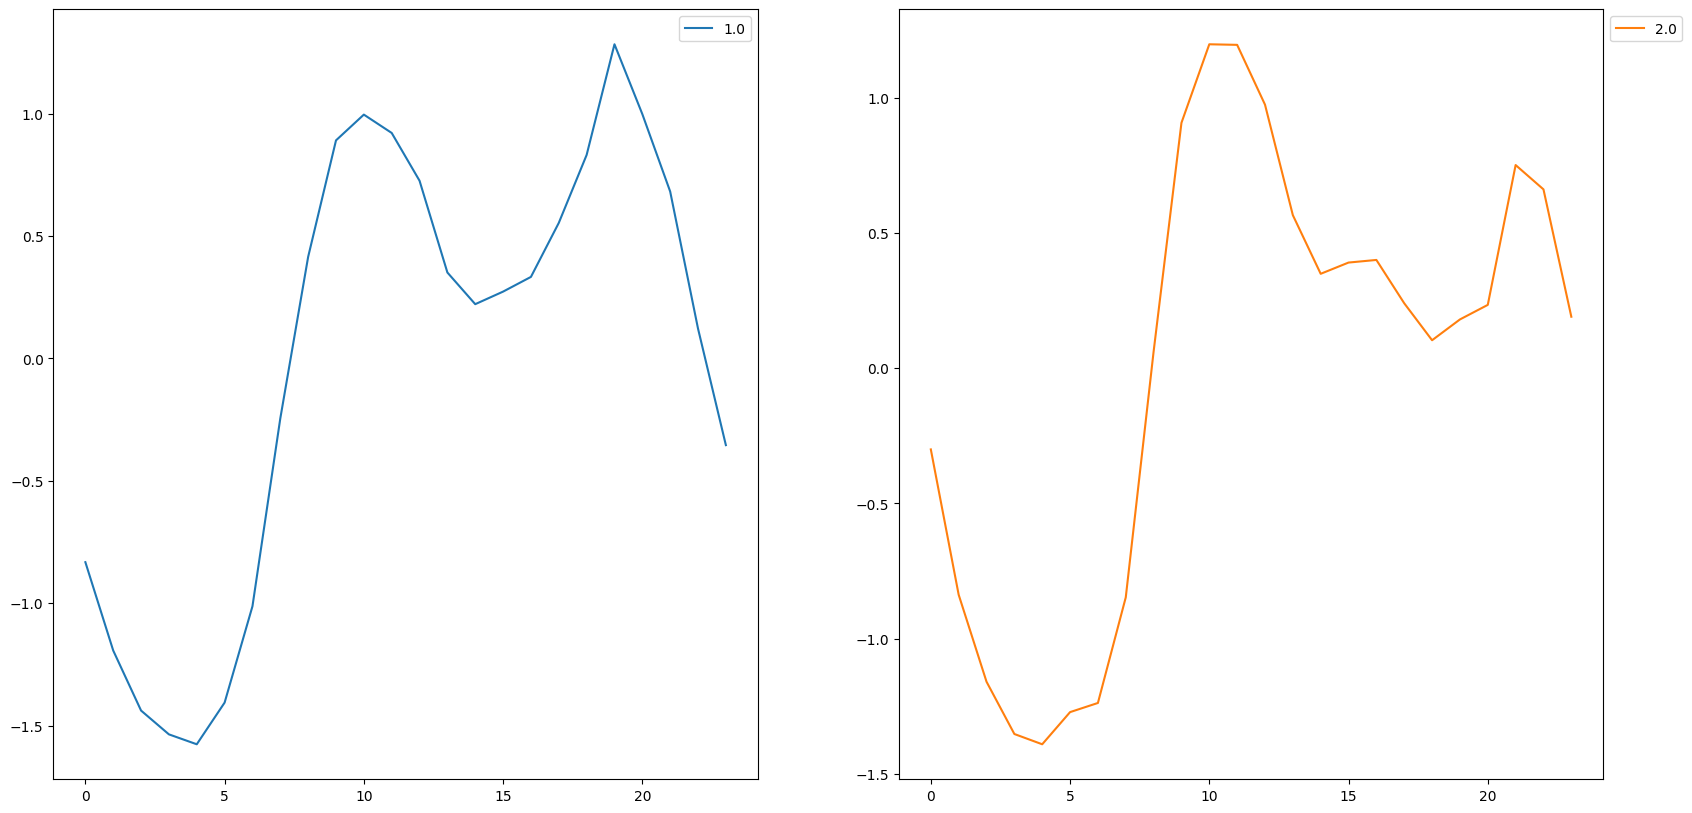

In [7]:
plot_mean_sample(easy_to_clf_uno_dataset[0].features,easy_to_clf_uno_dataset[0].target)

## Hard to clf data

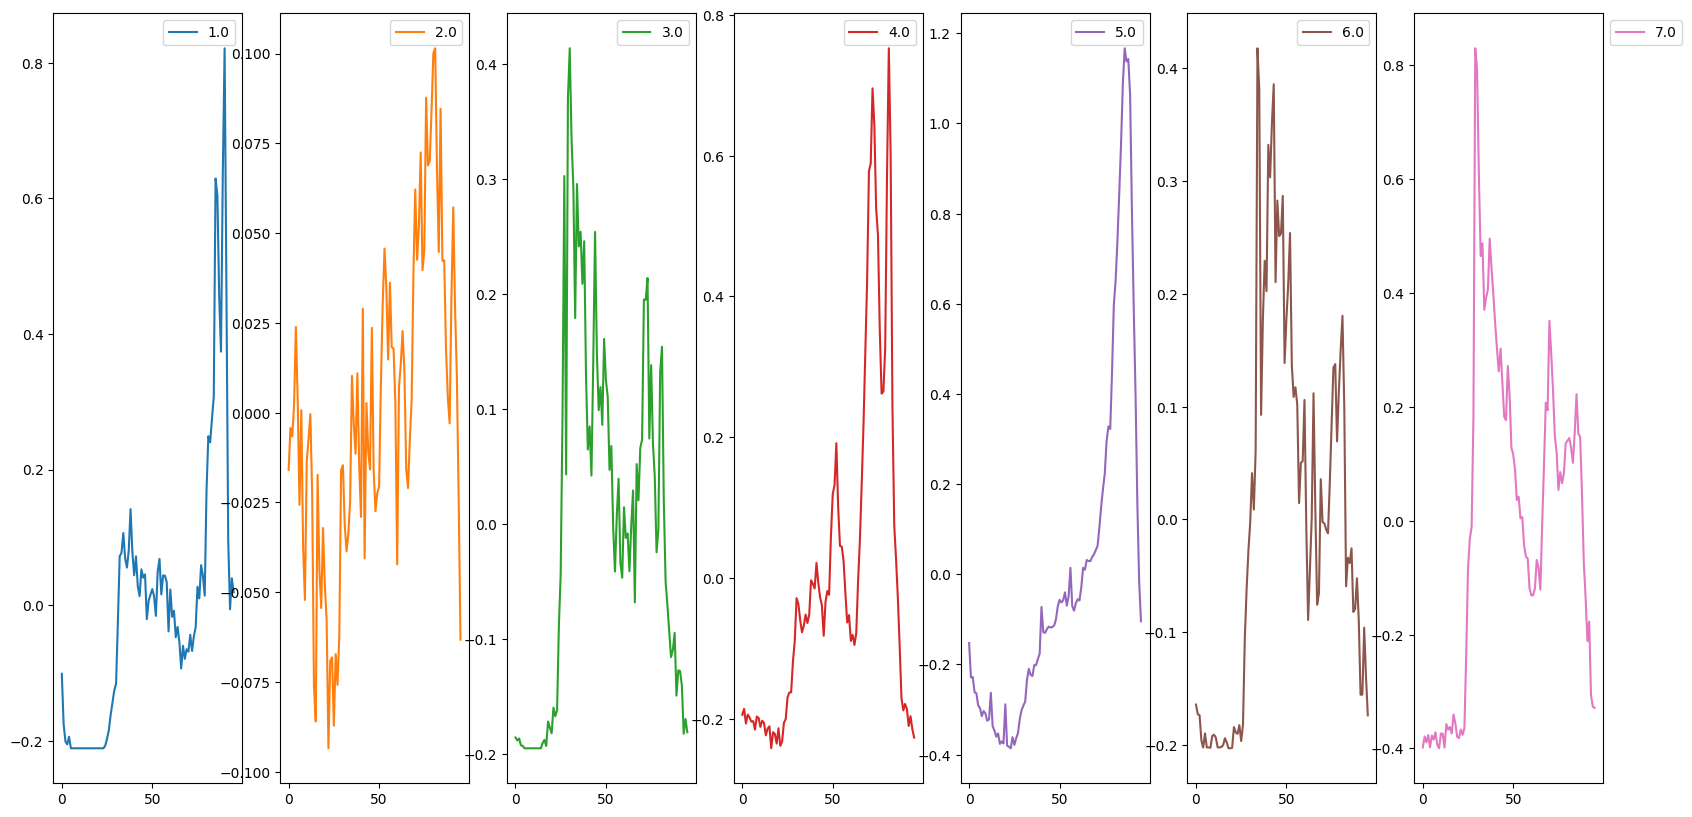

In [8]:
plot_mean_sample(hard_to_clf_uno_dataset[0].features,hard_to_clf_uno_dataset[0].target)

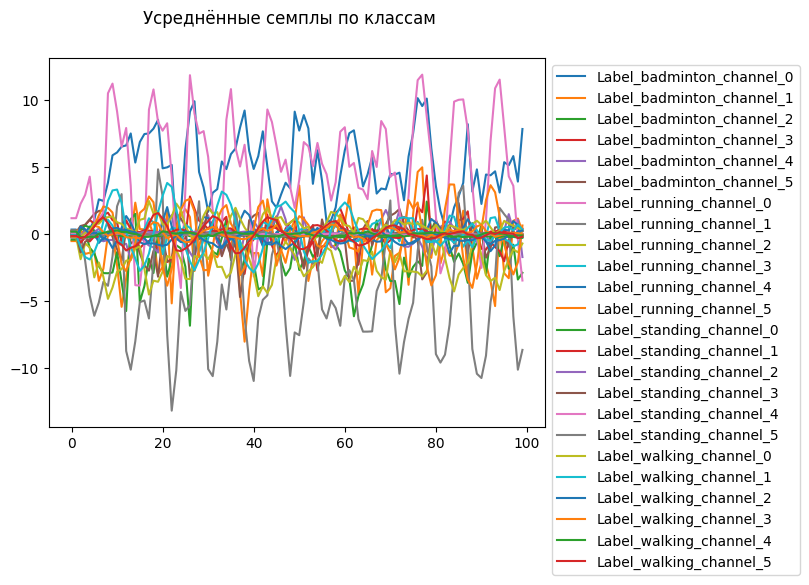

In [9]:
plot_mean_sample_multi(easy_to_clf_multi_dataset[0].features,easy_to_clf_multi_dataset[0].target)

# Transform initial row in feature vector. Easy dataset

In [10]:
stat_pipeline = pipeline_creator.create_pipeline(node_list_model)
feature_extractor = pipeline_creator.create_pipeline(['quantile_extractor'])
feature_matrix = feature_extractor.fit(easy_to_clf_uno_dataset[0])
initial_ts, transformed_ts = pd.DataFrame(feature_matrix.features.squeeze()),pd.DataFrame(feature_matrix.predict.squeeze())
transformed_ts['target'] = feature_matrix.target

In [11]:
node_dict = {'quantile_extractor':{'window_size':10,
                                   'stride':50}}

In [12]:
transformed_ts.groupby(by='target').first()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
target,,,,,,,,,,,,,,,,,,,,,
1.0,-0.532565,-1.170139,3.0,0.097182,0.785926,1.667704,0.958333,0.083333,0.898154,4.501629,...,0.743115,1.125000e-09,0.416926,0.978945,1.417548,-1.641826,-1.608472,-0.997747,0.669957,1.205923
2.0,0.056140,-0.909639,3.0,0.075741,0.892806,1.435281,0.958333,0.125000,0.841321,4.168296,...,0.768841,-6.666667e-10,-0.030488,0.978945,1.714364,-1.550198,-1.541755,-0.762200,0.673081,1.489222


In [13]:
result_dict = ApiTemplate(api_config=api_config,
                          metric_list=metric_names).eval(dataset='ItalyPowerDemand',
                                                         finetune=finetune,
                                                         initial_assumption = node_list_model)

Creating Dask Server
2024-10-21 14:55:37,211 - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2024-10-21 14:55:37,217 - State start
2024-10-21 14:55:37,220 - Found stale lock file and directory 'C:\\Users\\user\\AppData\\Local\\Temp\\dask-scratch-space\\scheduler-ub6_f_nr', purging
2024-10-21 14:55:37,221 - Found stale lock file and directory 'C:\\Users\\user\\AppData\\Local\\Temp\\dask-scratch-space\\scheduler-wq5_42et', purging
2024-10-21 14:55:37,223 - Found stale lock file and directory 'C:\\Users\\user\\AppData\\Local\\Temp\\dask-scratch-space\\worker-5pg8n1u_', purging
2024-10-21 14:55:37,224 - Found stale lock file and directory 'C:\\Users\\user\\AppData\\Local\\Temp\\dask-scratch-space\\worker-a8c6mb2y', purging
2024-10-21 14:55:37,232 -   Scheduler at: inproc://10.64.4.172/21832/1
2024-10-21 14:55:37,233 -   dashboard at:  http://10.64.4.172:8787/status
2024-10-21 14:55:37,233 - Registering Worker plug

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

IndustrialDispatcher - Number of used CPU's: 2
2024-10-21 14:55:44,356 - full garbage collection released 12.33 MiB from 42122 reference cycles (threshold: 9.54 MiB)
PipelineObjectiveEvaluate - Unsuccessful pipeline fit during fitness evaluation. Skipping the pipeline. Exception <Found input variables with inconsistent numbers of samples: [1, 44]> on ((/n_quantile_extractor;)/n_topological_extractor;)/n_logit
PipelineObjectiveEvaluate - Unsuccessful pipeline fit during fitness evaluation. Skipping the pipeline. Exception <Found input variables with inconsistent numbers of samples: [1, 44]> on ((/n_fourier_basis;)/n_topological_extractor;;/n_quantile_extractor;)/n_logit
IndustrialDispatcher - 5 individuals out of 13 in previous population were evaluated successfully. 0.38461538461538464% is a fairly small percentage of successful evaluation.
IndustrialEvoOptimizer - Generation num: 1 size: 5
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<accuracy=-0.956 no

Generations:   0%|          | 0/10000 [00:36<?, ?gen/s]

OptimisationTimer - Composition time: 0.608 min
OptimisationTimer - Algorithm was terminated due to processing time limit
IndustrialEvoOptimizer - Generation num: 2 size: 1
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<accuracy=-0.956 node_number=0.400>']
IndustrialEvoOptimizer - no improvements for 1 iterations
IndustrialEvoOptimizer - spent time: 0.6 min
GPComposer - GP composition finished
DataSourceSplitter - K-folds cross validation is applied.
ApiComposer - Hyperparameters tuning started with 0 min. timeout
SimultaneousTuner - Hyperparameters optimization start: estimation of metric for initial graph


SimultaneousTuner - Initial graph: {'depth': 3, 'length': 4, 'nodes': [logit, quantile_extractor, channel_filtration, eigen_basis]}
logit - {}
quantile_extractor - {}
channel_filtration - {}
eigen_basis - {} 
Initial metric: [0.956]
  0%|          | 0/100000 [00:00<?, ?trial/s, best loss=?]2024-10-21 14:56:15,471 - build_posterior_wrapper took 0.020036 seconds
2024-10-21 14:56:15,473 - TPE using 0 trials
PipelineObjectiveEvaluate - Unsuccessful pipeline fit during fitness evaluation. Skipping the pipeline. Exception <only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices> on ((/n_eigen_basis_{'low_rank_approximation': False, 'rank_regularization': 'hard_thresholding', 'window_size': 25};)/n_channel_filtration_{'centroid_metric': 'euclidean', 'distance': 'chebyshev', 'sample_metric': 'cosine', 'selection_strategy': 'sum'};;/n_quantile_extractor_{'add_global_features': True, 'stride': 2, 'window_size': 5};)/n_logit_{'C': 6.98

In [14]:
print(result_dict['metrics'])

   accuracy     f1  precision
0     0.963  0.963      0.963


# Transform initial row in feature vector. Hard dataset

In [15]:
stat_pipeline = pipeline_creator.create_pipeline(node_list_model)
feature_extractor = pipeline_creator.create_pipeline(['quantile_extractor'])
feature_matrix = feature_extractor.fit(hard_to_clf_uno_dataset[0])
initial_ts, transformed_ts = pd.DataFrame(feature_matrix.features.squeeze()),pd.DataFrame(feature_matrix.predict.squeeze())
transformed_ts['target'] = feature_matrix.target

In [16]:
transformed_ts

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,target
0,5.966985,38.522001,3.0,-0.001364,0.300924,0.000000,0.989583,0.041667,0.375589,0.828100,...,-4.437500e-09,-0.213951,0.994778,7.513700,-0.213951,-0.213951,-0.213951,-0.213951,0.328340,6.0
1,2.726445,5.845252,30.0,0.010189,0.098683,0.022019,0.989583,0.041667,0.801460,4.898707,...,7.291667e-10,-0.342460,0.994778,3.750432,-0.364030,-0.360435,-0.353245,-0.331226,2.910553,4.0
2,0.873085,-0.957327,16.0,0.000105,0.094746,1.850185,0.989583,0.343750,0.174343,2.144298,...,1.041667e-09,-0.713092,0.994778,2.164974,-0.713092,-0.713092,-0.713092,1.137093,1.753821,2.0
3,0.963595,-0.921340,7.0,0.003412,0.220262,1.687961,0.989583,0.156250,0.688291,1.923668,...,3.437500e-09,-0.681677,0.994778,1.915187,-0.681677,-0.681677,-0.681677,1.006285,1.742063,2.0
4,0.710418,-0.989141,28.0,0.000204,0.061140,1.739863,0.989583,0.583333,-0.366485,3.064565,...,1.979166e-10,-0.461327,0.994778,2.148468,-0.856751,-0.856751,-0.856751,0.883112,1.832129,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,2.164995,2.743942,12.0,-0.003806,0.110030,0.000000,0.989583,0.260417,-0.156627,0.572108,...,4.166668e-10,-0.393694,0.994778,2.513585,-0.393694,-0.393694,-0.393694,-0.393694,2.513585,5.0
8922,-1.239693,-0.473465,22.0,-0.000775,0.125696,0.000000,0.989583,0.479167,-0.315068,0.794347,...,9.791667e-09,0.558378,0.994778,0.558378,-1.772245,-1.772245,0.558378,0.558378,0.558378,5.0
8923,5.932263,36.119172,43.0,0.010063,0.060494,0.294614,0.989583,0.020833,0.661946,1.267773,...,1.625000e-09,-0.036827,0.994778,6.444689,-0.331441,-0.331441,-0.331441,-0.036827,-0.036827,5.0
8924,6.315938,43.871301,3.0,0.002808,0.873119,0.000000,0.989583,0.041667,0.048379,0.333216,...,-4.625929e-18,-0.186165,0.994778,7.870049,-0.186165,-0.186165,-0.186165,-0.186165,-0.186165,3.0


In [17]:
transformed_ts.groupby(by='target').first()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
target,,,,,,,,,,,,,,,,,,,,,
1.0,5.860285,35.044228,2.0,0.010183,0.859622,0.000000,0.989583,0.041667,0.321436,0.614287,...,0.885914,2.479167e-09,-0.196559,0.994778,6.413422,-0.196559,-0.196559,-0.196559,-0.196559,0.075523
2.0,0.873085,-0.957327,16.0,0.000105,0.094746,1.850185,0.989583,0.343750,0.174343,2.144298,...,0.695167,1.041667e-09,-0.713092,0.994778,2.164974,-0.713092,-0.713092,-0.713092,1.137093,1.753821
3.0,4.781473,22.104585,5.0,0.002226,0.289339,0.000000,0.989583,0.083333,-0.038430,0.498850,...,0.788571,-2.166667e-09,-0.215854,0.994778,5.694767,-0.215854,-0.215854,-0.215854,-0.215854,0.131830
4.0,2.726445,5.845252,30.0,0.010189,0.098683,0.022019,0.989583,0.041667,0.801460,4.898707,...,0.591460,7.291667e-10,-0.342460,0.994778,3.750432,-0.364030,-0.360435,-0.353245,-0.331226,2.910553
5.0,1.309320,-0.292210,21.0,0.001156,0.110845,0.000000,0.989583,0.447917,-0.297297,0.776556,...,0.670729,-1.250000e-09,-0.542402,0.994778,1.824445,-0.542402,-0.542402,-0.542402,-0.542402,1.824445
6.0,5.966985,38.522001,3.0,-0.001364,0.300924,0.000000,0.989583,0.041667,0.375589,0.828100,...,0.806000,-4.437500e-09,-0.213951,0.994778,7.513700,-0.213951,-0.213951,-0.213951,-0.213951,0.328340
7.0,5.442467,34.217175,5.0,0.002869,0.310618,0.000000,0.989583,0.020833,0.060477,0.663817,...,0.806000,1.145833e-09,-0.241564,0.994778,7.416788,-0.241564,-0.241564,-0.241564,-0.241564,1.253535


In [18]:
result_dict = ApiTemplate(api_config=api_config,
                          metric_list=metric_names).eval(dataset='Phoneme',
                                                         finetune=finetune,
                                                         initial_assumption = node_list_model)

2024-10-21 14:56:55,596 - Reading data from D:\WORK\Repo\Industiral\IndustrialTS\fedot_ind\data\Phoneme
2024-10-21 14:56:56,087 - Data read successfully from local folder
2024-10-21 14:56:56,088 - Initialising experiment setup
2024-10-21 14:56:56,095 - -------------------------------------------------
2024-10-21 14:56:56,096 - Initialising Industrial Repository
2024-10-21 14:56:56,097 - -------------------------------------------------
2024-10-21 14:56:56,097 - Initialising Dask Server
Creating Dask Server
2024-10-21 14:56:56,104 - State start
2024-10-21 14:56:56,114 -   Scheduler at: inproc://10.64.4.172/21832/14
2024-10-21 14:56:56,115 -   dashboard at:  http://10.64.4.172:58755/status
2024-10-21 14:56:56,116 - Registering Worker plugin shuffle
2024-10-21 14:56:56,128 -       Start worker at: inproc://10.64.4.172/21832/17
2024-10-21 14:56:56,129 -          Listening to:          inproc10.64.4.172
2024-10-21 14:56:56,130 -           Worker name:                          0
2024-10-21 1

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

IndustrialDispatcher - Number of used CPU's: 2
IndustrialDispatcher - 1 individuals out of 13 in previous population were evaluated successfully. 0.07692307692307693% is a fairly small percentage of successful evaluation.
IndustrialEvoOptimizer - Generation num: 1 size: 1
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<accuracy=-0.103 node_number=0.200>']
GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 0/10000 [03:39<?, ?gen/s]

OptimisationTimer - Composition time: 3.665 min
OptimisationTimer - Algorithm was terminated due to processing time limit
IndustrialEvoOptimizer - Generation num: 2 size: 1
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<accuracy=-0.103 node_number=0.200>']
IndustrialEvoOptimizer - no improvements for 1 iterations
IndustrialEvoOptimizer - spent time: 3.7 min
GPComposer - GP composition finished
DataSourceSplitter - Hold out validation is applied.
ApiComposer - Time for pipeline composing was 0:03:39.954146.
The remaining 2.7 seconds are not enough to tune the hyperparameters.
ApiComposer - Composed pipeline returned without tuning.


ApiComposer - Model generation finished
FEDOT logger - Final pipeline was fitted
FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [logit, quantile_extractor]}
logit - {'C': 2.5395989642679324, 'penalty': 'l1', 'solver': 'liblinear'}
quantile_extractor - {'window_size': 5, 'stride': 3, 'add_global_features': False}
MemoryAnalytics - Memory consumption for finish in main session: current 68.0 MiB, max: 97.6 MiB
FEDOT logger - Predictions was saved in current directory.
FEDOT logger - Predictions was saved in current directory.


In [19]:
print(result_dict['metrics'])

   accuracy     f1  precision
0     0.126  0.119      0.069


## Классификация с помощью частотных преобразований

In [5]:
EMG = 'NerveDamage'
EEG = 'MotorImagery'
fourier_model = ['fourier_basis', 'quantile_extractor', 'rf']
wavelet_model = ['wavelet_basis', 'quantile_extractor', 'rf']
stat_model = ['quantile_extractor', 'rf']

In [6]:
emg_dataset = pipeline_creator.create_input_data(EMG)
eeg_dataset = pipeline_creator.create_input_data(EEG)

### Fourier Hyperparams

In [7]:
fourier_params = {'threshold': {'hyperopt-dist': hp.choice, 'sampling-scope': [list(np.arange(0.75, 0.99, 0.05))]},
         'low_rank': {'hyperopt-dist': hp.choice, 'sampling-scope': [[x for x in range(1, 30, 3)]]},
         'approximation': {'hyperopt-dist': hp.choice, 'sampling-scope': [['smooth', 'exact']]},
         'output_format': {'hyperopt-dist': hp.choice, 'sampling-scope': [['signal', 'spectrum']]}
         }

In [8]:
stat_params =  {'window_size': {'hyperopt-dist': hp.choice, 'sampling-scope': [[x for x in range(5, 50, 5)]]},
         'stride': {'hyperopt-dist': hp.choice, 'sampling-scope': [[x for x in range(1, 10, 1)]]},
         'add_global_features': {'hyperopt-dist': hp.choice, 'sampling-scope': [[True, False]]}}

In [9]:
wavelet_params = {'n_components': {'hyperopt-dist': hp.uniformint, 'sampling-scope': [2, 10]},
         'wavelet': {'hyperopt-dist': hp.choice,
                     'sampling-scope': [['mexh', 'morl', 'db5', 'sym5']]}}
discrete_wav = DISCRETE_WAVELETS
cont_wat = CONTINUOUS_WAVELETS

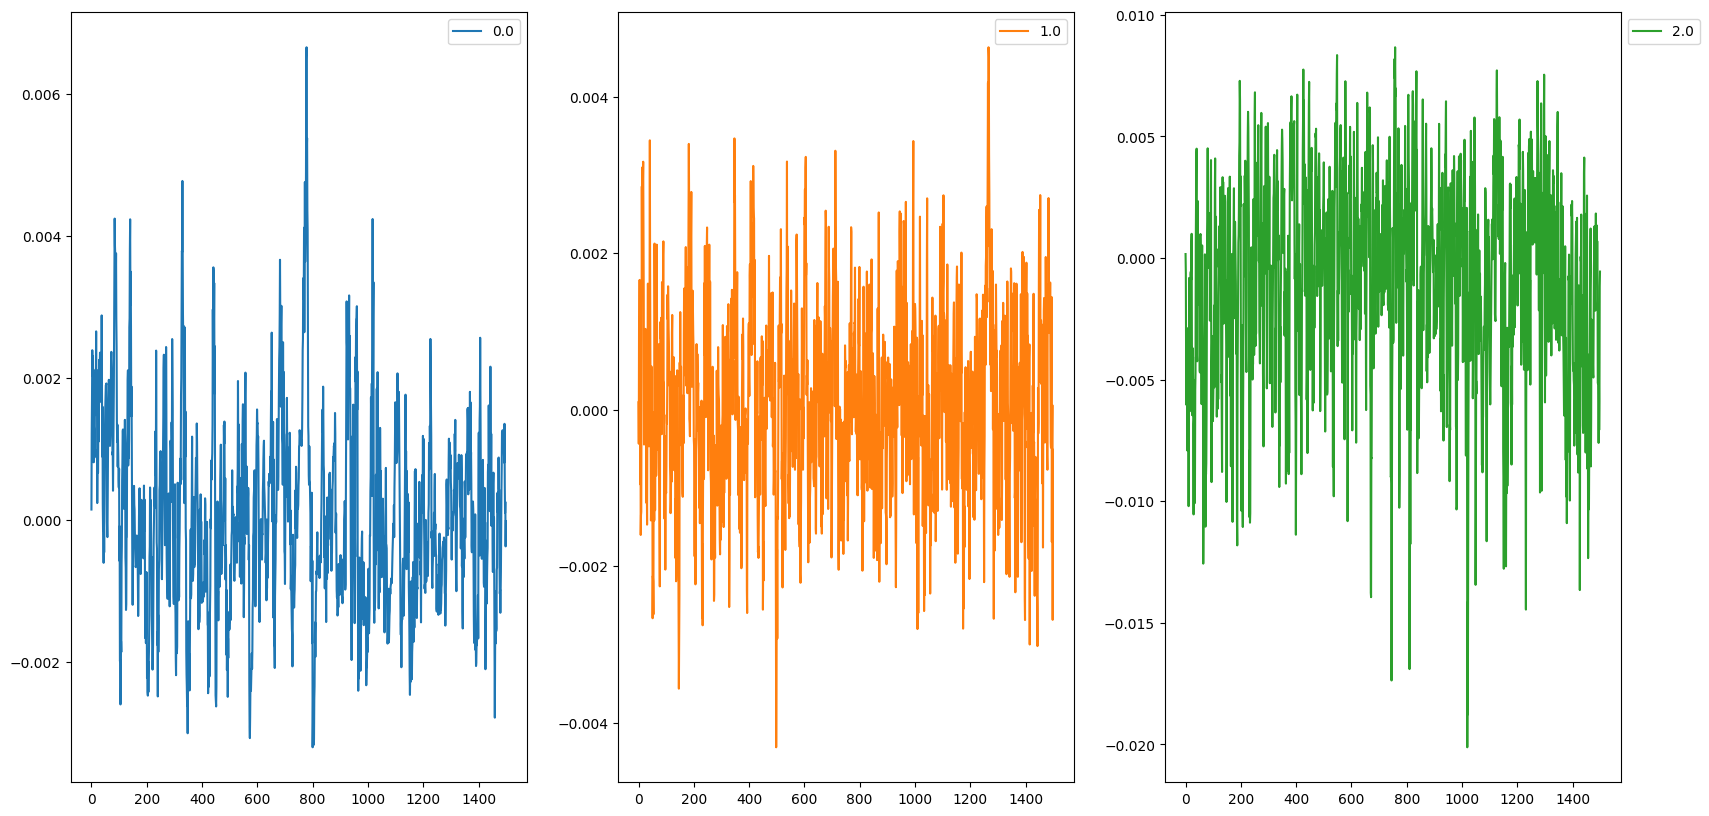

In [10]:
plot_mean_sample(emg_dataset[0].features,emg_dataset[0].target)

In [61]:
threshold =  0.9
output_format = 'signal'
approximation = 'smooth'
low_rank = 10

In [62]:
estimator = SPECTRUM_ESTIMATORS['eigen']
wavelet = 'gaus8'
n_components = 5
low_freq = True

In [63]:
fourier_node_dict = {'fourier_basis':{'threshold':threshold,
                                'approximation':approximation,
                              'low_rank':low_rank}}

In [64]:
wavelet_node_dict = {'wavelet_basis':{'wavelet':wavelet,
                                'n_components':n_components,
                                      'low_freq':low_freq}}

In [65]:
feature_extractor = pipeline_creator.create_pipeline(fourier_node_dict)
feature_matrix = feature_extractor.fit(emg_dataset[0])

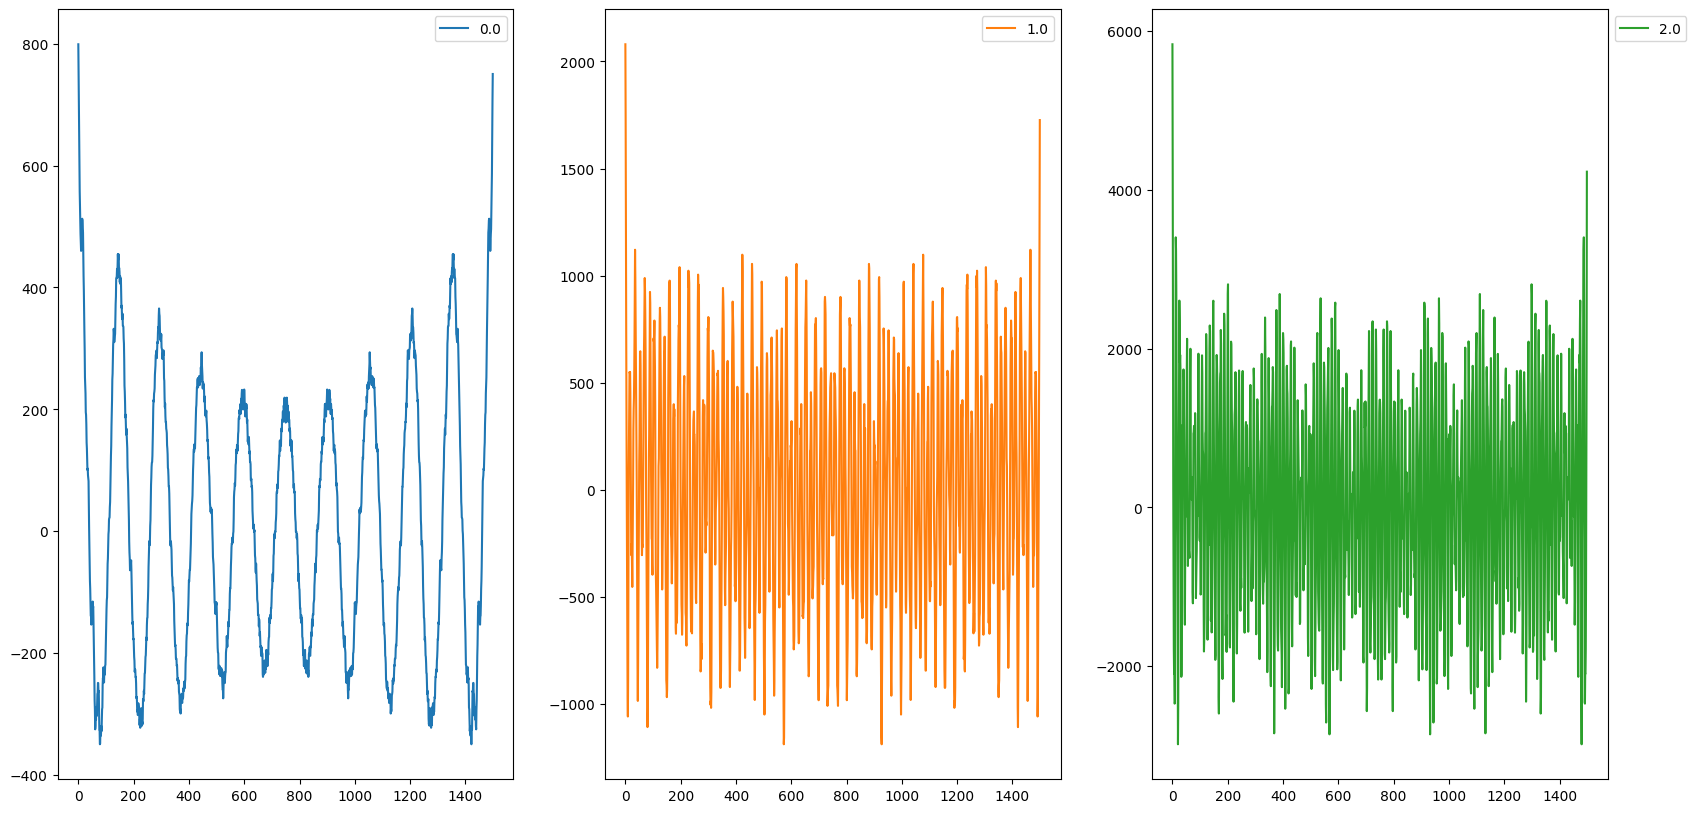

In [66]:
plot_mean_sample(feature_matrix.predict, feature_matrix.target)

In [50]:
feature_extractor = pipeline_creator.create_pipeline(wavelet_node_dict)
feature_matrix = feature_extractor.fit(emg_dataset[0])

In [51]:
n_channels = list(range(feature_matrix.predict.shape[1]))

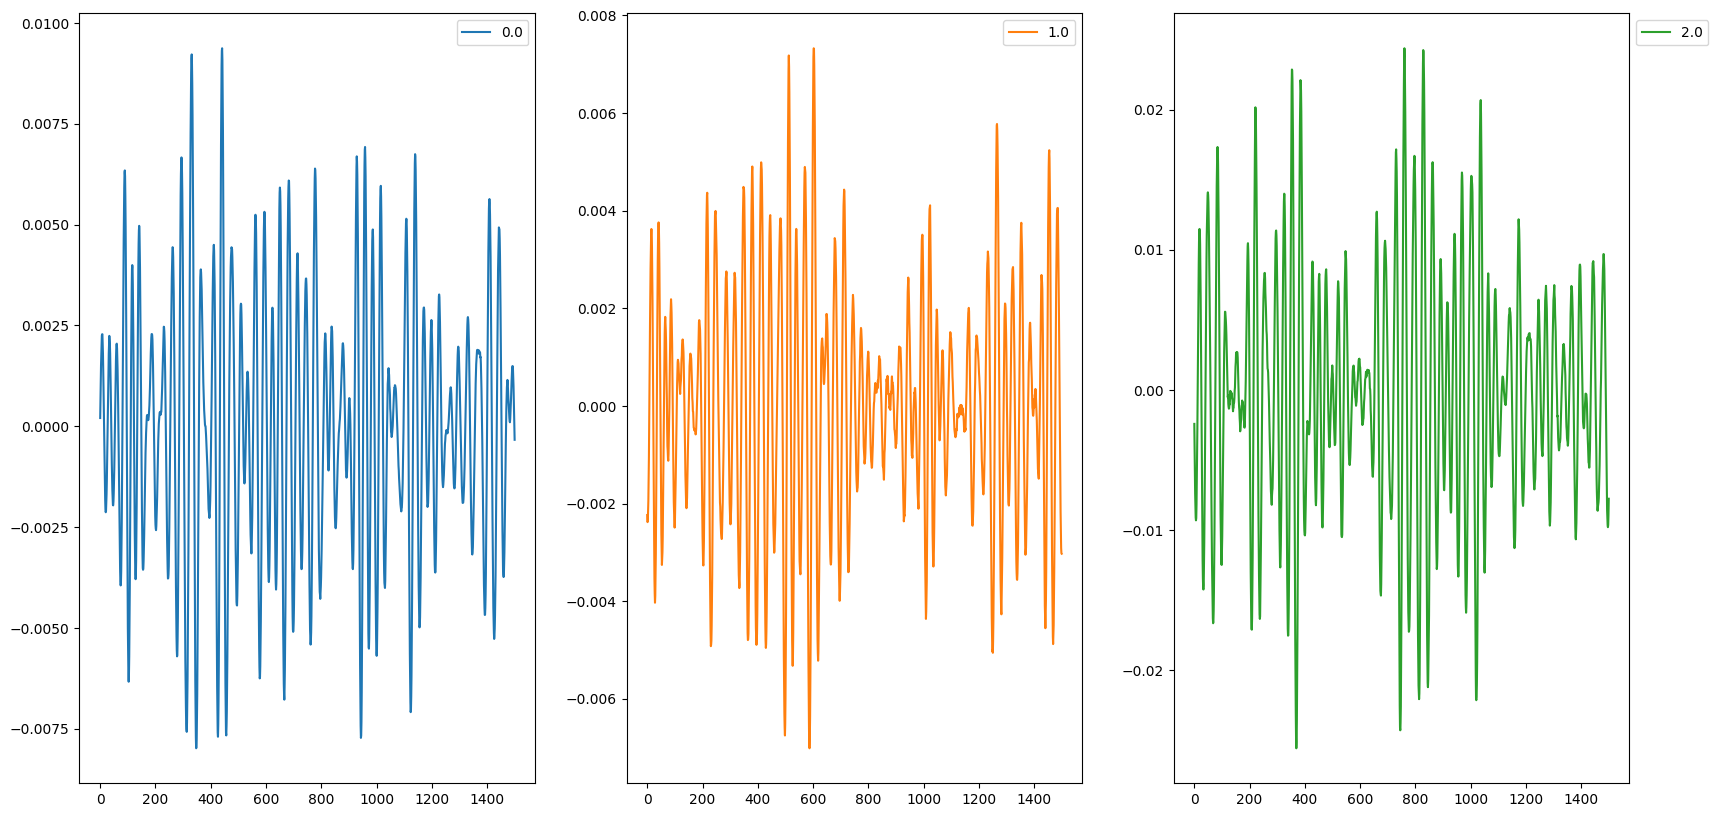

In [52]:
for channel in n_channels:
    y = np.expand_dims(feature_matrix.predict[:,channel,:], axis=1)
    plot_mean_sample(y, feature_matrix.target)

In [34]:
stat_list_model =  {'quantile_extractor':{'window_size':10,
                                             'add_global_features':True,
                                             'use_sliding_window':False},
                       'logit':{}}

In [35]:
result_dict_stat = ApiTemplate(api_config=api_config,
                          metric_list=metric_names).eval(dataset='NerveDamage',
                                                         finetune=finetune,
                                                         initial_assumption = stat_list_model)

2024-10-21 15:03:35,270 - Reading data from D:\WORK\Repo\Industiral\IndustrialTS\fedot_ind\data\NerveDamage
2024-10-21 15:03:35,523 - Data read successfully from local folder
2024-10-21 15:03:35,527 - Initialising experiment setup
2024-10-21 15:03:35,549 - -------------------------------------------------
2024-10-21 15:03:35,550 - Initialising Industrial Repository
2024-10-21 15:03:35,551 - -------------------------------------------------
2024-10-21 15:03:35,551 - Initialising Dask Server
Creating Dask Server
2024-10-21 15:03:35,558 - State start
2024-10-21 15:03:35,568 -   Scheduler at: inproc://10.64.4.172/21832/53
2024-10-21 15:03:35,569 -   dashboard at:  http://10.64.4.172:59133/status
2024-10-21 15:03:35,569 - Registering Worker plugin shuffle
2024-10-21 15:03:35,581 -       Start worker at: inproc://10.64.4.172/21832/56
2024-10-21 15:03:35,582 -          Listening to:          inproc10.64.4.172
2024-10-21 15:03:35,583 -           Worker name:                          0
2024-10-

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

IndustrialDispatcher - Number of used CPU's: 2


Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001C611AF2430>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 1950244182032
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001C6151208B0>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 1950267027344
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001C5FF3F4F70>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 195020

2024-10-21 15:04:53,169 - full garbage collection released 19.01 MiB from 36669 reference cycles (threshold: 9.54 MiB)


Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001C616E32550>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 1950046001840
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001C6143D1EE0>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 1949910308496
Exception ignored in: <function _WeakKeyDictionary.__setitem__.<locals>.on_destroy at 0x000001C605C3E820>
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\fedot-ind-bTwQVkVM-py3.9\lib\site-packages\joblib\_dask.py", line 87, in on_destroy
    del self._data[key]
KeyError: 195016

IndustrialDispatcher - 1 individuals out of 13 in previous population were evaluated successfully. 0.07692307692307693% is a fairly small percentage of successful evaluation.
IndustrialEvoOptimizer - Generation num: 1 size: 1
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<accuracy=-0.988 node_number=0.200>']
GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 0/10000 [05:17<?, ?gen/s]

OptimisationTimer - Composition time: 5.289 min
OptimisationTimer - Algorithm was terminated due to processing time limit
IndustrialEvoOptimizer - Generation num: 2 size: 1
IndustrialEvoOptimizer - Best individuals: HallOfFame archive fitness (1): ['<accuracy=-0.988 node_number=0.200>']
IndustrialEvoOptimizer - no improvements for 1 iterations
IndustrialEvoOptimizer - spent time: 5.3 min
GPComposer - GP composition finished
DataSourceSplitter - K-folds cross validation is applied.
ApiComposer - Time for pipeline composing was 0:05:17.341698.
The remaining 4.3 seconds are not enough to tune the hyperparameters.
ApiComposer - Composed pipeline returned without tuning.


ApiComposer - Model generation finished
FEDOT logger - Final pipeline was fitted
FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [logit, quantile_extractor]}
logit - {'C': 5.243806353645889, 'penalty': 'l1', 'solver': 'liblinear'}
quantile_extractor - {'window_size': 25, 'stride': 9, 'add_global_features': True}
MemoryAnalytics - Memory consumption for finish in main session: current 87.6 MiB, max: 96.2 MiB
FEDOT logger - Predictions was saved in current directory.
FEDOT logger - Predictions was saved in current directory.


In [36]:
result_dict_stat['metrics']

,accuracy,f1,precision
0,1.0,1.0,1.0


In [67]:
fourier_list_model =  {'fourier_basis':{'threshold':threshold,
                                'approximation':approximation,
                              'low_rank':low_rank},
                       'quantile_extractor':{'window_size':10,
                                             'add_global_features':True,
                                             'use_sliding_window':False},
                       'logit':{}}

In [68]:
result_dict_fourier = ApiTemplate(api_config=api_config,
                                    metric_list=metric_names).eval(dataset='NerveDamage',
                                                         finetune=finetune,
                                                         initial_assumption = fourier_list_model)

Creating Dask Server
2024-10-21 19:03:41,872 - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2024-10-21 19:03:41,877 - State start
2024-10-21 19:03:41,887 -   Scheduler at: inproc://10.64.4.172/26676/1
2024-10-21 19:03:41,888 -   dashboard at:  http://10.64.4.172:8787/status
2024-10-21 19:03:41,889 - Registering Worker plugin shuffle
2024-10-21 19:03:41,905 -       Start worker at: inproc://10.64.4.172/26676/4
2024-10-21 19:03:41,905 -          Listening to:          inproc10.64.4.172
2024-10-21 19:03:41,906 -           Worker name:                          0
2024-10-21 19:03:41,907 -          dashboard at:          10.64.4.172:55982
2024-10-21 19:03:41,907 - Waiting to connect to: inproc://10.64.4.172/26676/1
2024-10-21 19:03:41,908 - -------------------------------------------------
2024-10-21 19:03:41,908 -               Threads:                          8
2024-10-21 19:03:41,908 -                Memory:   

In [69]:
result_dict_fourier['metrics']

,accuracy,f1,precision
0,0.561,0.576,0.512


In [40]:
wavelet_list_model =  {'wavelet_basis':{'wavelet':wavelet,
                                'n_components':n_components,
                                      'low_freq':low_freq},
                       'quantile_extractor':{'window_size':10,
                                             'add_global_features':True,
                                             'use_sliding_window':False},
                       'logit':{}}

In [41]:
result_dict_wavelet = ApiTemplate(api_config=api_config,
                                    metric_list=metric_names).eval(dataset='NerveDamage',
                                                         finetune=finetune,
                                                         initial_assumption = wavelet_list_model)

2024-10-21 15:10:20,836 - Reading data from D:\WORK\Repo\Industiral\IndustrialTS\fedot_ind\data\NerveDamage
2024-10-21 15:10:21,049 - Data read successfully from local folder
2024-10-21 15:10:21,054 - Initialising experiment setup
2024-10-21 15:10:21,080 - -------------------------------------------------
2024-10-21 15:10:21,084 - Initialising Industrial Repository
2024-10-21 15:10:21,085 - -------------------------------------------------
2024-10-21 15:10:21,086 - Initialising Dask Server
Creating Dask Server
2024-10-21 15:10:21,093 - State start
2024-10-21 15:10:21,103 -   Scheduler at: inproc://10.64.4.172/21832/100
2024-10-21 15:10:21,103 -   dashboard at:  http://10.64.4.172:59476/status
2024-10-21 15:10:21,104 - Registering Worker plugin shuffle
2024-10-21 15:10:21,120 -       Start worker at: inproc://10.64.4.172/21832/103
2024-10-21 15:10:21,121 -          Listening to:          inproc10.64.4.172
2024-10-21 15:10:21,122 -           Worker name:                          0
2024-1

In [42]:
result_dict_wavelet['metrics']

,accuracy,f1,precision
0,1.0,1.0,1.0
